In [1]:
# authorize google account to use bigquery
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# authorize drive to pull model
from google.colab import drive
drive.mount('/content/drive')

# pull data for repo from bigquery
project_id = 'uic-capstone-int'
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

Authenticated
Mounted at /content/drive


In [83]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [84]:
df = pd.read_csv('/content/drive/My Drive/Cloudbakers/Assets/Final_ds_193repos.csv')

In [85]:
df.drop(['datetime','Unnamed: 0'], axis=1, inplace=True)

In [86]:
df = df[pd.notnull(df['Status'])]

In [87]:
df.fillna(0, inplace=True)

In [90]:
df.reset_index(level=0, inplace=True)
df.drop('index', axis=1, inplace=True)

In [89]:
df.to_csv('/content/drive/My Drive/Cloudbakers/Assets/RFdataset.csv')

# Random Forest model

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


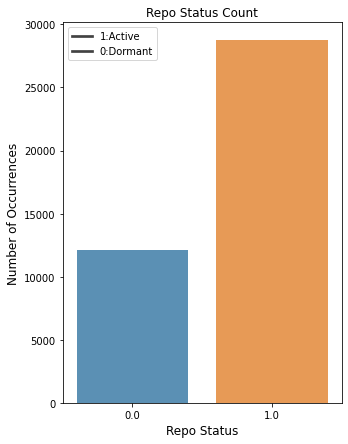

In [91]:
status_count  = df['Status'].value_counts()
fig = plt.figure(facecolor='white', figsize=(5,7) )
sns.barplot(status_count.index, status_count.values, alpha=0.8)
plt.title('Repo Status Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Repo Status', fontsize=12)
plt.legend(['1:Active','0:Dormant'])
plt.show()

In [92]:
df.drop(['Total_count', 'number_of_issues'], axis=1, inplace=True)

In [95]:
y = df['Status']
X = df.drop('Status', axis =1)
y = pd.DataFrame(y)

In [ ]:
Columns = X.columns

In [100]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=Columns)
X

,year,month,day,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,commit_count,unique_committer_count
0,0.95,0.363636,0.833333,0.093458,0.000000,0.025773,0.000000,0.002933,0.012552,0.0000,0.000000,0.002341,0.018868
1,0.95,0.454545,0.033333,0.135514,0.000000,0.015464,0.000000,0.000000,0.000000,0.0000,0.000000,0.001404,0.018868
2,0.95,0.454545,0.266667,0.373832,0.000000,0.048969,0.000000,0.002933,0.008368,0.0625,0.142857,0.004213,0.018868
3,0.95,0.454545,0.500000,0.345794,0.000000,0.064433,0.000000,0.004888,0.016736,0.0000,0.000000,0.006554,0.018868
4,0.95,0.454545,0.733333,0.070093,0.011905,0.020619,0.004016,0.001955,0.008368,0.0000,0.000000,0.001404,0.018868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40870,0.95,1.000000,0.700000,0.411215,0.059524,0.221649,0.096386,0.126100,0.175732,0.1875,0.428571,0.000000,0.000000
40871,0.95,1.000000,0.933333,0.144860,0.047619,0.054124,0.120482,0.039101,0.104603,0.0000,0.000000,0.000000,0.000000
40872,1.00,0.000000,0.133333,0.140187,0.023810,0.043814,0.080321,0.012708,0.033473,0.0000,0.000000,0.000000,0.000000
40873,1.00,0.000000,0.366667,0.088785,0.023810,0.043814,0.076305,0.051808,0.138075,0.0000,0.000000,0.000000,0.000000


In [105]:
X.drop(['year','month','day'], axis = 1, inplace=True)

In [106]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [109]:
# Training a basal random forest model
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
# Feature importance
rf_predictions = model.predict(X_test)
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

commit_count              0.238769
number_of_Bookmarks       0.173041
number_of_pushes          0.127392
number_of_pulls           0.109272
number_of_forks           0.105399
unique_committer_count    0.086195
issue_comment_count       0.079558
issue_author_count        0.063903
commit_comment_count      0.008353
commit_author_count       0.008116
dtype: float64